# Kickstarter Project

### Definition of relevant columns

* backers_count: amount of people pledging money to the project                                     
* category -> 'slug': name of the projects' specific parent- & sub-category (part of json string)
* country: country of the projects creator 
* creator -> 'id': id of the creator -> to be used as categorical variable (part of json string)
* goal: information on the amount of money needed to succeed in the local currency of the project
* launched_at: start date? of the project ()
* deadline: end date of the project ()
* spotlight: project highlighted on the website
* staff_pick: marked by a staff member of kickstarter (more attention drawn towards project)
* state: (successful/failed/canceled/live/suspended) -> exclude 'live' and combine 'canceled', 'suspended' with 'failed'
* static_usd_rate: exchange rate to transform goal in every column from current currency to USD



### Stakeholder: Project creator 
### Question: Is it useful to put much effort into launching a campaign on kickstarter? 
### Measure: Is the campaign likely to succeed or fail?

## Import Libraries

In [18]:
# Libraries

import os, json, re
import pandas as pd 



## Important Functions

In [3]:
######### functions for pre-processing ####################################################################

def extract_year_date_month(df, column):
    '''Takes a column, converts it to datetime, and creates new columns with day, month and year
    The new columns are named:
        - column_weekday
        - column_month
        - column_year
    '''
    
    # Convert column in df to datetime
    df[column] = pd.to_datetime(df[column], unit='s')

    # extract the day, month, and year components
    df[column + '_' + 'weekday'] = df[column].dt.weekday
    df[column + '_' + 'month'] = df[column].dt.month
    #df[column + '_' + 'year'] = df[column].dt.year

    return df


def duration(df, column1, column2):
    '''Returns the duration in days between 2 columns with datetime and puts it into a new colum
        - column1: start date
        - column2: end date
    '''
    df['duration_days'] = (df[column2] - df[column1]).dt.days

    return df

def convert_to_usd(df):
    return round(df['goal'] * df['static_usd_rate'],2)

######### functions for analysing predictions ########################################################## 



## Load data into one dataframe

In [19]:
data =pd

In [20]:
directory = 'data-2/'
data = pd.DataFrame()
relevant_columns = ['backers_count', 'category', 'country', 'creator', 'spotlight', 'staff_pick', 'state', 'static_usd_rate', 'goal', 'launched_at', 'deadline']

for file in sorted(os.listdir(directory)):
    df_temp = pd.read_csv(directory+file)
    data = pd.concat([data, df_temp[relevant_columns]], ignore_index=True)

data.head()

,backers_count,category,country,creator,spotlight,staff_pick,state,static_usd_rate,goal,launched_at,deadline
0,21,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",US,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",True,False,successful,1.000000,200.0,1388011046,1391899046
1,97,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",US,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",True,False,successful,1.000000,400.0,1550073611,1551801611
2,88,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",US,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",True,True,successful,1.000000,27224.0,1478012330,1480607930
3,193,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",IT,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",True,False,successful,1.136525,40000.0,1540684582,1544309940
4,20,"{""id"":51,""name"":""Software"",""slug"":""technology/...",US,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",False,False,failed,1.000000,1000.0,1425919017,1428511017


## Work on the json string columns

### Extract the 'slug' parameter from the category column and drop the category column

In [21]:
cat_data = data["category"].apply(json.loads)
cat_data = pd.DataFrame(cat_data.tolist())
data['slug'] = cat_data['slug']
data = data.drop("category", axis=1)

### Extract the ID from the creator column and drop the creator column

In [22]:
data["creator_id"] = data["creator"].apply(lambda x: re.findall(r'\d+', x)[0])
data = data.drop("creator", axis=1)


## Work on the datetime columns

### Convert date-data to type date.time()

In [23]:
data['launched_at'] = pd.to_datetime(data['launched_at'], unit='s')
data['deadline'] = pd.to_datetime(data['deadline'], unit='s')

### Extract weekday and month of kickstarter project launch, as well as the duration of the kickstarter project and drop the "launched_at" and "deadline" column

In [24]:
data = extract_year_date_month(data, 'launched_at')
data = duration(data, 'launched_at', 'deadline')

data = data.drop(['launched_at', 'deadline'], axis=1)

### Convert unit of "goal" to USD and drop "static_usd_rate" and "goal" column

In [25]:
data['goal_in_usd'] = data.apply(convert_to_usd, axis=1)
data = data.drop(['static_usd_rate', 'goal'], axis=1)

In [45]:
data.head(10)

,backers_count,country,spotlight,staff_pick,state,slug,creator_id,launched_at_weekday,launched_at_month,duration_days,goal_in_usd
0,21,US,True,False,successful,music/rock,1495925645,2,12,45,200.00
1,97,US,True,False,successful,art/mixed media,1175589980,2,2,20,400.00
2,88,US,True,True,successful,photography/photobooks,1196856269,1,11,30,27224.00
3,193,IT,True,False,successful,fashion/footwear,1569700626,5,10,41,45461.00
4,20,US,False,False,failed,technology/software,1870845385,0,3,30,1000.00
5,77,GB,True,False,successful,fashion/accessories,385711367,4,2,15,567.75
6,15,US,True,False,successful,publishing/nonfiction,160498270,1,8,6,850.00
7,1,US,False,False,failed,technology/software,1188856672,1,11,10,20000.00
8,2,US,False,False,failed,art/sculpture,164923417,3,9,30,14500.00
9,31,US,False,False,failed,games/playing cards,1561008747,1,6,31,10000.00


# Data cleaing and Exploratory data Analysis

In [31]:
# find the missing numbers
data.isna().sum()

backers_count          0
country                0
spotlight              0
staff_pick             0
state                  0
slug                   0
creator_id             0
launched_at_weekday    0
launched_at_month      0
duration_days          0
goal_in_usd            0
dtype: int64

In [35]:
data.shape

(209222, 11)

In [44]:

# find and print duplicate value 
def print_duplicate_counts(data):
    """
    Print the total number of duplicate values in each column of the DataFrame.

    Parameters:
    - data: pandas DataFrame
    """
    for column in data.columns:
        duplicate_count = data[column].duplicated().sum()
        print(f"'{column}' has {duplicate_count} duplicate value(s).")

print_duplicate_counts(data)


'backers_count' has 205976 duplicate value(s).
'country' has 209200 duplicate value(s).
'spotlight' has 209220 duplicate value(s).
'staff_pick' has 209220 duplicate value(s).
'state' has 209217 duplicate value(s).
'slug' has 209053 duplicate value(s).
'creator_id' has 51896 duplicate value(s).
'launched_at_weekday' has 209215 duplicate value(s).
'launched_at_month' has 209210 duplicate value(s).
'duration_days' has 209129 duplicate value(s).
'goal_in_usd' has 159993 duplicate value(s).


* Our data does not have null values 
* we have duplicates because of catogorical data. 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   backers_count        209222 non-null  int64  
 1   country              209222 non-null  object 
 2   spotlight            209222 non-null  bool   
 3   staff_pick           209222 non-null  bool   
 4   state                209222 non-null  object 
 5   slug                 209222 non-null  object 
 6   creator_id           209222 non-null  object 
 7   launched_at_weekday  209222 non-null  int32  
 8   launched_at_month    209222 non-null  int32  
 9   duration_days        209222 non-null  int64  
 10  goal_in_usd          209222 non-null  float64
dtypes: bool(2), float64(1), int32(2), int64(2), object(4)
memory usage: 13.2+ MB


In [52]:
data.describe().round(2)

,backers_count,launched_at_weekday,launched_at_month,duration_days,goal_in_usd
count,209222.00,209222.00,209222.00,209222.00,2.092220e+05
mean,145.42,2.37,6.30,32.50,4.097268e+04
std,885.97,1.80,3.38,11.83,1.120040e+06
min,0.00,0.00,1.00,1.00,1.000000e-02
25%,4.00,1.00,3.00,29.00,1.500000e+03
50%,27.00,2.00,6.00,30.00,5.000000e+03
75%,89.00,4.00,9.00,34.00,1.300000e+04
max,105857.00,6.00,12.00,93.00,1.523501e+08


In [57]:
print(data.columns)

Index(['backers_count', 'country', 'spotlight', 'staff_pick', 'state', 'slug',
       'creator_id', 'launched_at_weekday', 'launched_at_month',
       'duration_days', 'goal_in_usd'],
      dtype='object')


# Maximum number of successful project with week days

In [101]:
# convert the launched_at_weekday to days name 
import calendar

# Define a function to convert day numbers to day names
def number_to_day_name(day_number):
    return calendar.day_name[day_number]

# Apply the function to create a new column with day names
data['day_name'] = data['launched_at_weekday'].apply(number_to_day_name)

# Display the resulting DataFrame
print(data)


        backers_count country  spotlight  staff_pick       state   
0                  21      US       True       False  successful  \
1                  97      US       True       False  successful   
2                  88      US       True        True  successful   
3                 193      IT       True       False  successful   
4                  20      US      False       False      failed   
...               ...     ...        ...         ...         ...   
209217             57      US       True       False  successful   
209218             11      AU      False       False      failed   
209219              0      US      False       False      failed   
209220             11      US       True       False  successful   
209221             49      GB       True       False  successful   

                               slug  creator_id  launched_at_weekday   
0                        music/rock  1495925645                    2  \
1                   art/mixed media  11

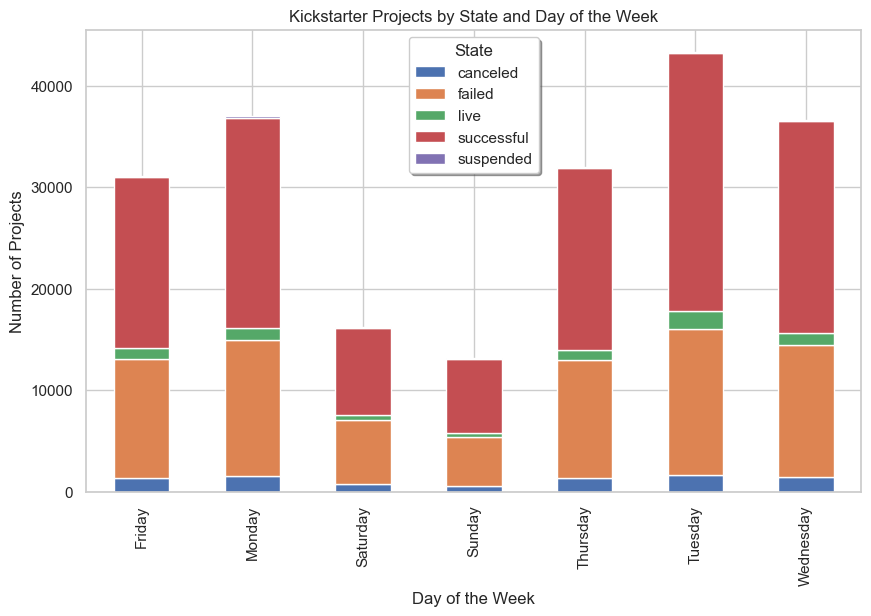

In [93]:
# Count the occurrences of each combination of 'state' and 'day_name'
count_data = data.groupby(['state', 'day_name']).size().reset_index(name='count')

# Pivot the data to get 'state' as columns
pivot_data = count_data.pivot(index='day_name', columns='state', values='count').fillna(0)

# Plotting
sns.set(style="whitegrid")  
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Kickstarter Projects by State and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Projects')
plt.legend(title='State', loc='upper center', bbox_to_anchor=(0.5, 1), fancybox=True, shadow=True)
plt.show()

In [99]:
# Group by 'day_name_column' and 'state_column' and count the occurrences
grouped_data = data.groupby(['day_name', 'state']).size().reset_index(name='count')

# Filter only successful projects
successful_projects = grouped_data[grouped_data['state'] == 'successful']

# Find the day with the maximum successful projects
max_successful_day = successful_projects.loc[successful_projects['count'].idxmax()]

# Print the result
print("Day with Maximum Successful Projects:", max_successful_day['day_name'])
print("Number of Successful Projects on that day:", max_successful_day['count'])

Day with Maximum Successful Projects: Tuesday
Number of Successful Projects on that day: 25385
